# Plot lots of ACCESS-OM3 timeseries

https://github.com/COSIMA/cosima-recipes/blob/main/Tutorials/Model_Agnostic_Analysis.ipynb

In [1]:
%matplotlib inline
import intake
import xarray as xr
import numpy as np
import cf_xarray as cfxr
import pint_xarray
from pint import application_registry as ureg
import cf_xarray.units
import cftime
import xgcm

import matplotlib.pyplot as plt
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft

from dask.distributed import Client

In [2]:
xr.set_options(keep_attrs=True); # cf_xarray works best when xarray keeps attributes by default

In [3]:
client = Client(threads_per_worker=1)
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43385 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/43385/status,
Dashboard: /proxy/43385/status,Workers: 14
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35381,Workers: 14
Dashboard: /proxy/43385/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:45181,Total threads: 1
Dashboard: /proxy/45167/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:36551,


In [4]:
# PATH='/scratch/v45/aek156/access-om3/archive/MOM6-CICE6-1deg_jra55do_ryf.iss138/'
PATH='/scratch/v45/aek156/access-om3/archive/MOM6-CICE6-1deg_jra55do_ryf.testAug2024/'

In [5]:
# from https://github.com/COSIMA/cosima-recipes/blob/main/Tutorials/ACCESS-NRI_Intake_Catalog.ipynb
# Try passing the following argument to your to_dask or to_dataset_dict call:
# See the xarray documentation on Reading multi-file datasets for more details about these arguments.
# https://docs.xarray.dev/en/stable/user-guide/io.html#reading-multi-file-datasets

xarray_combine_by_coords_kwargs=dict(
    compat="override",
    data_vars="minimal",
    coords="minimal"
)

In [6]:
datastore = intake.open_esm_datastore(PATH+'intake_datastore.json', columns_with_iterables=['variable'])

In [7]:
datastore.df

,path,realm,variable,frequency,start_date,end_date,variable_long_name,variable_standard_name,variable_cell_methods,variable_units,filename,file_id
0,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,seaIce,"[time_bounds, NCAT, VGRDi, VGRDs, VGRDb, VGRDa...",1day,"1900-01-01, 00:00:00","1900-01-02, 00:00:00","['time interval endpoints', 'category maximum ...","['', '', '', '', '', '', '', '', '', '', '', '...","['', '', '', '', '', '', '', '', '', 'time: me...","['days since 1900-01-01 00:00:00', 'm', '1', '...",access-om3.cice.h.1900-01-01.nc,access_om3_cice_h_XXXX_XX_XX
1,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,seaIce,"[time_bounds, NCAT, VGRDi, VGRDs, VGRDb, VGRDa...",1day,"1900-01-02, 00:00:00","1900-01-03, 00:00:00","['time interval endpoints', 'category maximum ...","['', '', '', '', '', '', '', '', '', '', '', '...","['', '', '', '', '', '', '', '', '', 'time: me...","['days since 1900-01-01 00:00:00', 'm', '1', '...",access-om3.cice.h.1900-01-02.nc,access_om3_cice_h_XXXX_XX_XX
2,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,seaIce,"[time_bounds, NCAT, VGRDi, VGRDs, VGRDb, VGRDa...",1day,"1900-01-03, 00:00:00","1900-01-04, 00:00:00","['time interval endpoints', 'category maximum ...","['', '', '', '', '', '', '', '', '', '', '', '...","['', '', '', '', '', '', '', '', '', 'time: me...","['days since 1900-01-01 00:00:00', 'm', '1', '...",access-om3.cice.h.1900-01-03.nc,access_om3_cice_h_XXXX_XX_XX
3,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,seaIce,"[time_bounds, NCAT, VGRDi, VGRDs, VGRDb, VGRDa...",1day,"1900-01-04, 00:00:00","1900-01-05, 00:00:00","['time interval endpoints', 'category maximum ...","['', '', '', '', '', '', '', '', '', '', '', '...","['', '', '', '', '', '', '', '', '', 'time: me...","['days since 1900-01-01 00:00:00', 'm', '1', '...",access-om3.cice.h.1900-01-04.nc,access_om3_cice_h_XXXX_XX_XX
4,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,seaIce,"[time_bounds, NCAT, VGRDi, VGRDs, VGRDb, VGRDa...",1day,"1900-01-05, 00:00:00","1900-01-06, 00:00:00","['time interval endpoints', 'category maximum ...","['', '', '', '', '', '', '', '', '', '', '', '...","['', '', '', '', '', '', '', '', '', 'time: me...","['days since 1900-01-01 00:00:00', 'm', '1', '...",access-om3.cice.h.1900-01-05.nc,access_om3_cice_h_XXXX_XX_XX
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[uo, vo, KE, h, thetao, so, agessc, rhopot0, v...",1mon,"1919-08-01, 00:00:00","1919-09-01, 00:00:00","['Sea Water X Velocity', 'Sea Water Y Velocity...","['sea_water_x_velocity', 'sea_water_y_velocity...","['z_l:mean yh:mean xq:point time: mean', 'z_l:...","['m s-1', 'm s-1', 'm2 s-2', 'm', 'degC', 'psu...",access-om3.mom6.h.z_1919_08.nc,access_om3_mom6_h_z_XXXX_XX
8756,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[uo, vo, KE, h, thetao, so, agessc, rhopot0, v...",1mon,"1919-09-01, 00:00:00","1919-10-01, 00:00:00","['Sea Water X Velocity', 'Sea Water Y Velocity...","['sea_water_x_velocity', 'sea_water_y_velocity...","['z_l:mean yh:mean xq:point time: mean', 'z_l:...","['m s-1', 'm s-1', 'm2 s-2', 'm', 'degC', 'psu...",access-om3.mom6.h.z_1919_09.nc,access_om3_mom6_h_z_XXXX_XX
8757,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[uo, vo, KE, h, thetao, so, agessc, rhopot0, v...",1mon,"1919-10-01, 00:00:00","1919-11-01, 00:00:00","['Sea Water X Velocity', 'Sea Water Y Velocity...","['sea_water_x_velocity', 'sea_water_y_velocity...","['z_l:mean yh:mean xq:point time: mean', 'z_l:...","['m s-1', 'm s-1', 'm2 s-2', 'm', 'degC', 'psu...",access-om3.mom6.h.z_1919_10.nc,access_om3_mom6_h_z_XXXX_XX
8758,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[uo, vo, KE, h, thetao, so, agessc, rhopot0, v...",1mon,"1919-11-01, 00:00:00","1919-12-01, 00:00:00","['Sea Water X Velocity', 'Sea Water Y Velocity...","['sea_water_x_velocity', 'sea_water_y_velocity...","['z_l:mean yh:mean xq:point time: mean', 'z_l:...","['m s-1', 'm s-1', 'm2 s-2', 'm'

In [8]:
datastore.search(path='.*access-om3\.mom6\.h\.native.*',
                 frequency='1mon').df.head()

,path,realm,variable,frequency,start_date,end_date,variable_long_name,variable_standard_name,variable_cell_methods,variable_units,filename,file_id
0,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[soga_max, thetaoga_max, uh, vh, SSH_max, mlot...",1mon,"1900-01-01, 00:00:00","1900-02-01, 00:00:00","['Global Mean Ocean Salinity', 'Global Mean Oc...","['sea_water_salinity', 'sea_water_potential_te...","['time: max', 'time: max', 'zl:sum yh:sum xq:p...","['psu', 'degC', 'm3 s-1', 'm3 s-1', 'm', 'm', ...",access-om3.mom6.h.native.max_1900_01.nc,access_om3_mom6_h_native_max_XXXX_XX
1,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[soga_max, thetaoga_max, uh, vh, SSH_max, mlot...",1mon,"1900-02-01, 00:00:00","1900-03-01, 00:00:00","['Global Mean Ocean Salinity', 'Global Mean Oc...","['sea_water_salinity', 'sea_water_potential_te...","['time: max', 'time: max', 'zl:sum yh:sum xq:p...","['psu', 'degC', 'm3 s-1', 'm3 s-1', 'm', 'm', ...",access-om3.mom6.h.native.max_1900_02.nc,access_om3_mom6_h_native_max_XXXX_XX
2,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[soga_max, thetaoga_max, uh, vh, SSH_max, mlot...",1mon,"1900-03-01, 00:00:00","1900-04-01, 00:00:00","['Global Mean Ocean Salinity', 'Global Mean Oc...","['sea_water_salinity', 'sea_water_potential_te...","['time: max', 'time: max', 'zl:sum yh:sum xq:p...","['psu', 'degC', 'm3 s-1', 'm3 s-1', 'm', 'm', ...",access-om3.mom6.h.native.max_1900_03.nc,access_om3_mom6_h_native_max_XXXX_XX
3,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[soga_max, thetaoga_max, uh, vh, SSH_max, mlot...",1mon,"1900-04-01, 00:00:00","1900-05-01, 00:00:00","['Global Mean Ocean Salinity', 'Global Mean Oc...","['sea_water_salinity', 'sea_water_potential_te...","['time: max', 'time: max', 'zl:sum yh:sum xq:p...","['psu', 'degC', 'm3 s-1', 'm3 s-1', 'm', 'm', ...",access-om3.mom6.h.native.max_1900_04.nc,access_om3_mom6_h_native_max_XXXX_XX
4,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[soga_max, thetaoga_max, uh, vh, SSH_max, mlot...",1mon,"1900-05-01, 00:00:00","1900-06-01, 00:00:00","['Global Mean Ocean Salinity', 'Global Mean Oc...","['sea_water_salinity', 'sea_water_potential_te...","['time: max', 'time: max', 'zl:sum yh:sum xq:p...","['psu', 'degC', 'm3 s-1', 'm3 s-1', 'm', 'm', ...",access-om3.mom6.h.native.max_1900_05.nc,access_om3_mom6_h_native_max_XXXX_XX


In [9]:
datastore.search(path='.*access-om3\.mom6\.h\.native.*',
                 frequency='1mon').df.head()['variable_cell_methods'][0]

"['time: max', 'time: max', 'zl:sum yh:sum xq:point time: max', 'zl:sum yq:point xh:sum time: max', 'area:mean yh:mean xh:mean time: max', 'area:mean yh:mean xh:mean time: max', '', '', '', '']"

In [10]:
datastore.search(path='.*access-om3\.mom6\.h\.native.*',
                 frequency='1mon',
                 variable_cell_methods='.*time: mean.*')

,unique
path,240
realm,1
variable,97
frequency,1
start_date,240
end_date,240
variable_long_name,1
variable_standard_name,1
variable_cell_methods,1
variable_units,1


In [11]:
# see https://github.com/COSIMA/cosima-recipes/blob/main/Tutorials/ACCESS-NRI_Intake_Catalog.ipynb
static = datastore.search(path='.*output000.*',
                          frequency='fx'
                         ).to_dask(xarray_combine_by_coords_kwargs=xarray_combine_by_coords_kwargs)

In [12]:
areacello = static['areacello']

see https://xgcm.readthedocs.io/en/latest/xgcm-examples/03_MOM6.html#xgcm-grid-definition

ACCESS-OM3 uses a non-symmetric memory layout, i.e. all fields have the same i and j sizes. See
https://mom6.readthedocs.io/en/main/api/generated/pages/Horizontal_Indexing.html?highlight=symmetric#declaration-of-variables

`MOM_parameter_doc.layout`:
```
!SYMMETRIC_MEMORY_ = False      !   [Boolean]
                                ! If defined, the velocity point data domain includes every face of the
                                ! thickness points. In other words, some arrays are larger than others,
                                ! depending on where they are on the staggered grid.  Also, the starting index
                                ! of the velocity-point arrays is usually 0, not 1. This can only be set at
                                ! compile time.```


In [13]:
# for non-symmetric 
# SYMMETRIC_MEMORY_ = False
# see https://xgcm.readthedocs.io/en/latest/xgcm-examples/03_MOM6.html#xgcm-grid-definition
# and https://xgcm.readthedocs.io/en/latest/grid_metrics.html#Using-metrics-with-xgcm
grid = xgcm.Grid(static,
                 coords={'X': {'center': 'xh', 'right': 'xq'},
                         'Y': {'center': 'yh', 'right': 'yq'},},
                         # 'Z': { 'inner': 'zl', 'outer': 'zi'}},
                 metrics = {
                        ('X',): ['dxt', 'dxCu', 'dxCv'], # X distances
                        ('Y',): ['dyt', 'dyCu', 'dyCv'], # Y distances
                        ('X', 'Y'): ['areacello', 'areacello_cu', 'areacello_cv', 'areacello_bu'] # Areas
                        },
                 periodic=['X'])

In [14]:
datastore.search(path='.*access-om3\.mom6\.h\.native.*',
                          frequency='1mon',
                          variable_cell_methods='.*time: mean.*'
                         ).to_dask(xarray_combine_by_coords_kwargs=xarray_combine_by_coords_kwargs)

<xarray.Dataset> Size: 120GB
Dimensions:                                (time: 240, scalar_axis: 1, zl: 50,
                                            yh: 300, xq: 360, yq: 300, xh: 360,
                                            zi: 51, nv: 2)
Coordinates:
  * scalar_axis                            (scalar_axis) float64 8B 0.0
  * time                                   (time) object 2kB 1900-01-16 12:00...
  * nv                                     (nv) float64 16B 1.0 2.0
  * xq                                     (xq) float64 3kB -279.0 ... 80.0
  * yh                                     (yh) float64 2kB -77.88 ... 89.77
  * zl                                     (zl) float64 400B 1.152 ... 5.572e+03
  * xh                                     (xh) float64 3kB -279.5 ... 79.5
  * yq                                     (yq) float64 2kB -77.75 ... 90.0
  * zi                                     (zi) float64 408B 0.0 2.303 ... 6e+03
Data variables: (12/97)
    soga                                   (time, scalar_axis) float32 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    thetaoga                               (time, scalar_axis) float32 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    sss_global                             (time, scalar_axis) float32 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    sst_global                             (time, scalar_axis) float32 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    uh                                     (time, zl, yh, xq) float32 5GB dask.array<chunksize=(1, 50, 300, 360), meta=np.ndarray>
    vh                                     (time, zl, yq, xh) float32 5GB dask.array<chunksize=(1, 50, 300, 360), meta=np.ndarray>
    ...                                     ...
    speed                                  (time, yh, xh) float32 104MB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    mlotst                                 (time, yh, xh) float32 104MB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    average_T1                             (time) datetime64[ns] 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2                             (time) datetime64[ns] 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT                             (time) timedelta64[ns] 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    time_bnds                              (time, nv) object 4kB dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/16)
    NumFilesInSet:                            1
    title:                                    MOM6 diagnostic fields table
    associated_files:                         areacello: access-om3.mom6.h.st...
    grid_type:                                regular
    grid_tile:                                N/A
    intake_esm_vars:                          ['soga', 'thetaoga', 'sss_globa...
    ...                                       ...
    intake_esm_attrs:variable_standard_name:  ['sea_water_salinity', 'sea_wat...
    intake_esm_attrs:variable_cell_methods:   ['time: mean', 'time: mean', 't...
    intake_esm_attrs:variable_units:          ['psu', 'degC', 'psu', 'degC', ...
    intake_esm_attrs:file_id:                 access_om3_mom6_h_native_XXXX_XX
    intake_esm_attrs:_data_format_:           netcdf
    intake_esm_dataset_key:                   access_om3_mom6_h_native_XXXX_X...

In [15]:
datastore.search(variable='KE', frequency='1mon').df.head()

,path,realm,variable,frequency,start_date,end_date,variable_long_name,variable_standard_name,variable_cell_methods,variable_units,filename,file_id
0,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[soga, thetaoga, sss_global, sst_global, uh, v...",1mon,"1900-01-01, 00:00:00","1900-02-01, 00:00:00","['Global Mean Ocean Salinity', 'Global Mean Oc...","['sea_water_salinity', 'sea_water_potential_te...","['time: mean', 'time: mean', 'time: mean', 'ti...","['psu', 'degC', 'psu', 'degC', 'm3 s-1', 'm3 s...",access-om3.mom6.h.native_1900_01.nc,access_om3_mom6_h_native_XXXX_XX
1,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[soga, thetaoga, sss_global, sst_global, uh, v...",1mon,"1900-02-01, 00:00:00","1900-03-01, 00:00:00","['Global Mean Ocean Salinity', 'Global Mean Oc...","['sea_water_salinity', 'sea_water_potential_te...","['time: mean', 'time: mean', 'time: mean', 'ti...","['psu', 'degC', 'psu', 'degC', 'm3 s-1', 'm3 s...",access-om3.mom6.h.native_1900_02.nc,access_om3_mom6_h_native_XXXX_XX
2,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[soga, thetaoga, sss_global, sst_global, uh, v...",1mon,"1900-03-01, 00:00:00","1900-04-01, 00:00:00","['Global Mean Ocean Salinity', 'Global Mean Oc...","['sea_water_salinity', 'sea_water_potential_te...","['time: mean', 'time: mean', 'time: mean', 'ti...","['psu', 'degC', 'psu', 'degC', 'm3 s-1', 'm3 s...",access-om3.mom6.h.native_1900_03.nc,access_om3_mom6_h_native_XXXX_XX
3,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[soga, thetaoga, sss_global, sst_global, uh, v...",1mon,"1900-04-01, 00:00:00","1900-05-01, 00:00:00","['Global Mean Ocean Salinity', 'Global Mean Oc...","['sea_water_salinity', 'sea_water_potential_te...","['time: mean', 'time: mean', 'time: mean', 'ti...","['psu', 'degC', 'psu', 'degC', 'm3 s-1', 'm3 s...",access-om3.mom6.h.native_1900_04.nc,access_om3_mom6_h_native_XXXX_XX
4,/scratch/v45/aek156/access-om3/archive/MOM6-CI...,ocean,"[soga, thetaoga, sss_global, sst_global, uh, v...",1mon,"1900-05-01, 00:00:00","1900-06-01, 00:00:00","['Global Mean Ocean Salinity', 'Global Mean Oc...","['sea_water_salinity', 'sea_water_potential_te...","['time: mean', 'time: mean', 'time: mean', 'ti...","['psu', 'degC', 'psu', 'degC', 'm3 s-1', 'm3 s...",access-om3.mom6.h.native_1900_05.nc,access_om3_mom6_h_native_XXXX_XX


In [16]:
fields_mean = ['thetaoga', 'tos', 'soga', 'sos', 'sss_global', 'SSH', 'volo', 'masso',]# 'KE']
data_mean = { k: datastore.search(variable=k, frequency='1mon', variable_cell_methods='.*time: mean.*').to_dask(
    xarray_combine_by_coords_kwargs=xarray_combine_by_coords_kwargs) for k in fields_mean }

In [32]:
fields_min = [ 'SSH_min', 'mlotst_min','uh', 'vh' ]
data_min = { k: datastore.search(variable=k, frequency='1mon', variable_cell_methods='.*time: min.*').to_dask(
    xarray_combine_by_coords_kwargs=xarray_combine_by_coords_kwargs) for k in fields_min }

In [33]:
fields_max = [ 'SSH_max', 'mlotst_max', 'uh', 'vh' ]
data_max = { k: datastore.search(variable=k, frequency='1mon', variable_cell_methods='.*time: max.*').to_dask(
    xarray_combine_by_coords_kwargs=xarray_combine_by_coords_kwargs) for k in fields_max }

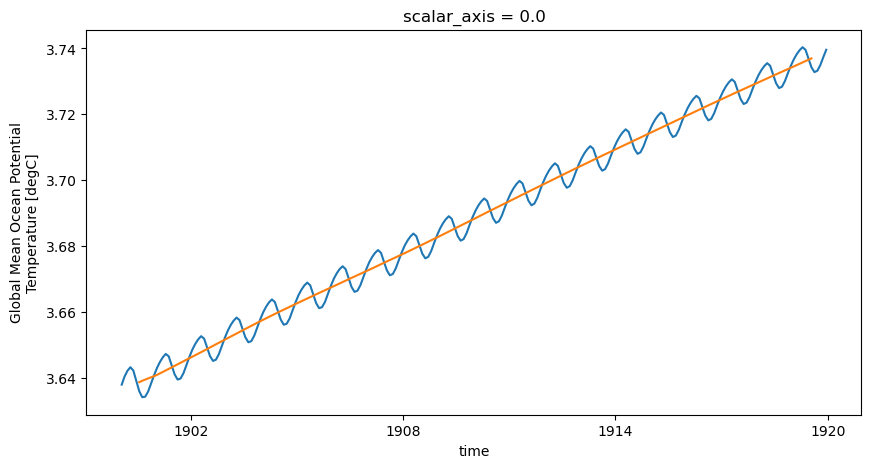

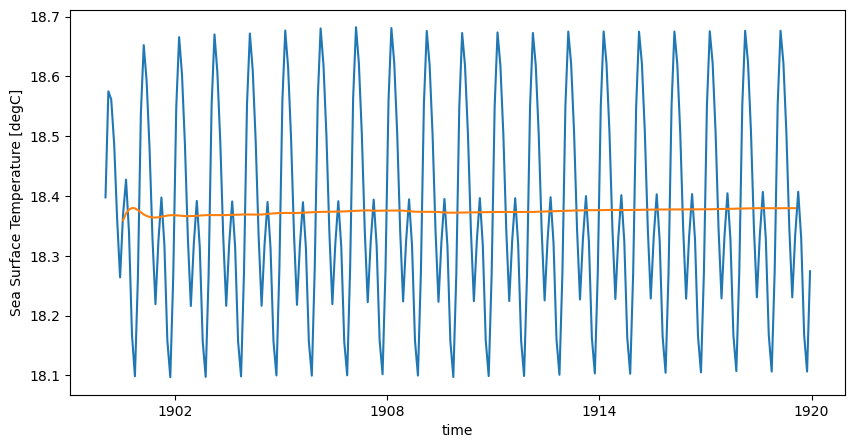

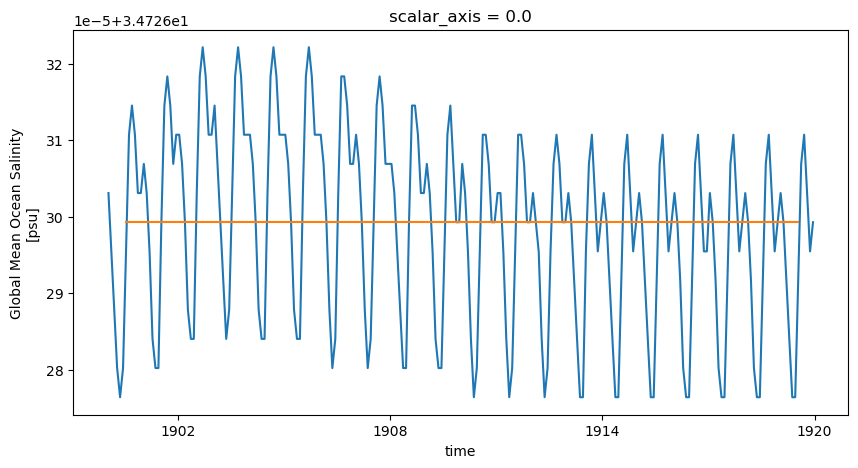

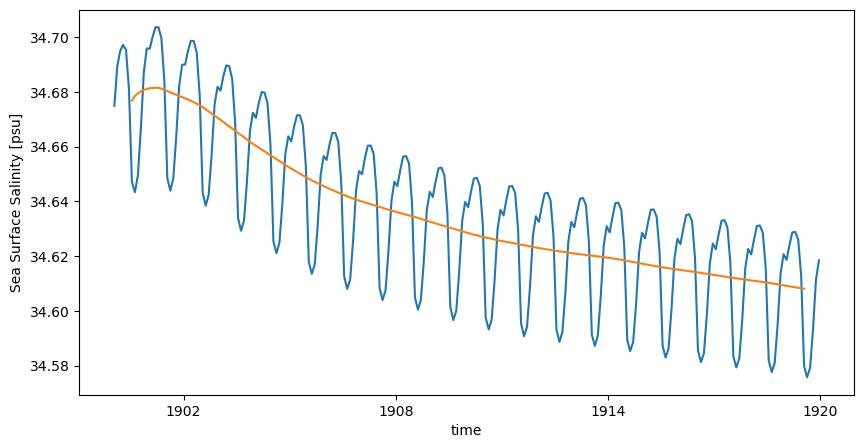

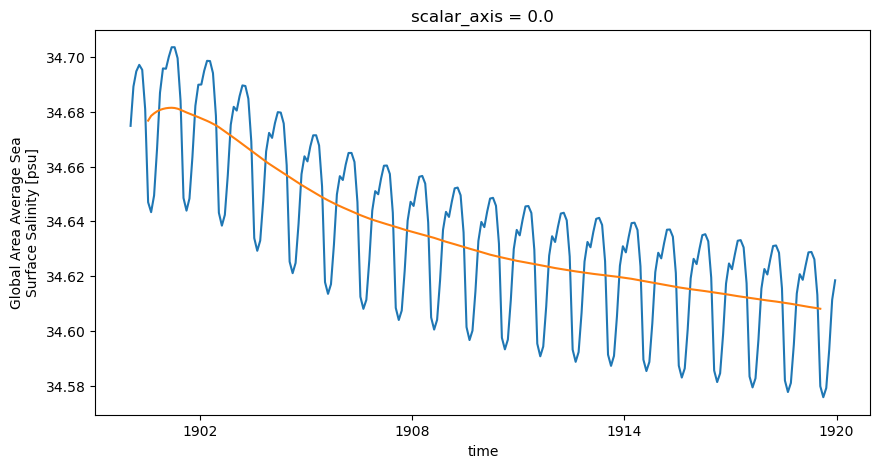

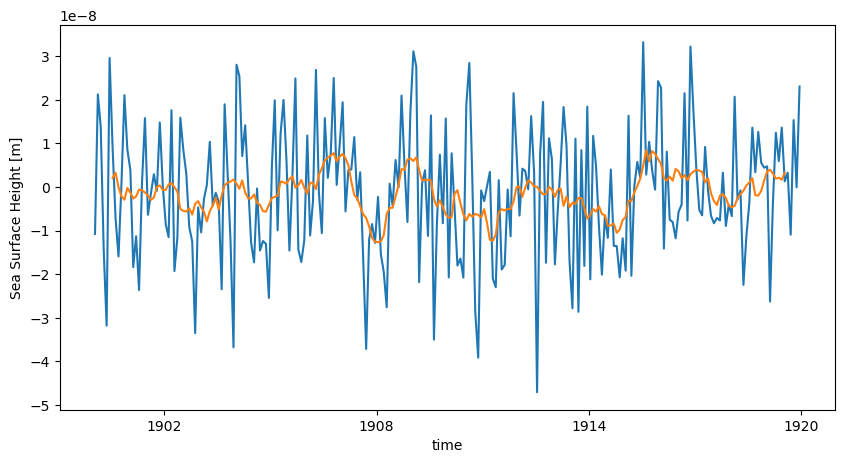

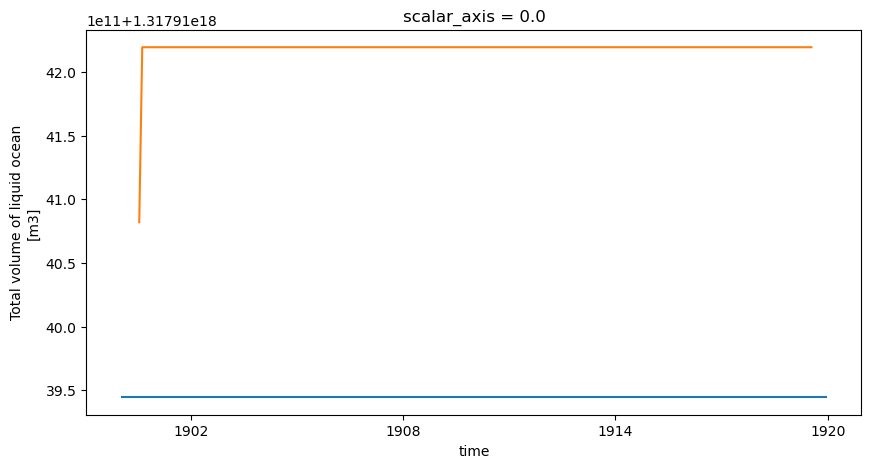

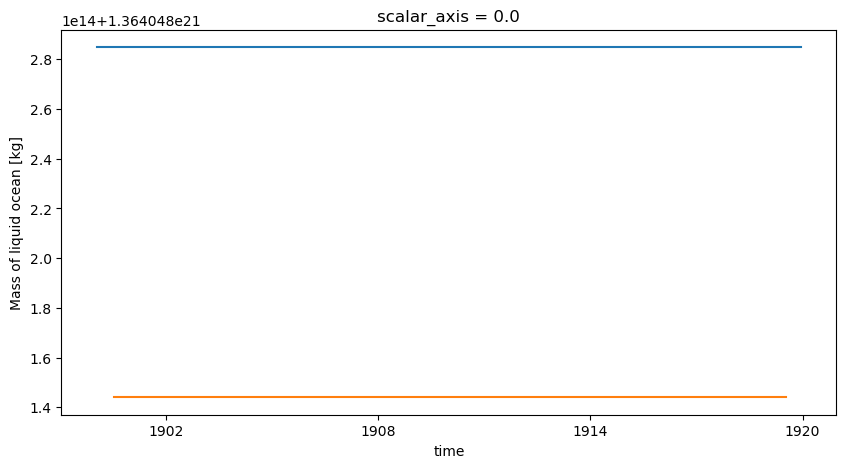

In [18]:
for k, d in data_mean.items():
    plt.figure(figsize=(10,5))
    dat = d[k]
    if 'depth' in dat.cf.coords: # https://xgcm.readthedocs.io/en/latest/grid_metrics.html?highlight=average#Grid-aware-(weighted)-average
        dat = grid.average(dat, ['X', 'Y', 'Z'])
    elif 'longitude' in dat.cf.coords: # https://xgcm.readthedocs.io/en/latest/grid_metrics.html?highlight=average#Grid-aware-(weighted)-average
        dat = grid.average(dat, ['X', 'Y'])
    dat.load()
    dat.plot()
    # dat.cf.resample(time='1YE').mean('time').plot()
    dat.cf.rolling(time=12, center=True).mean('time').plot()

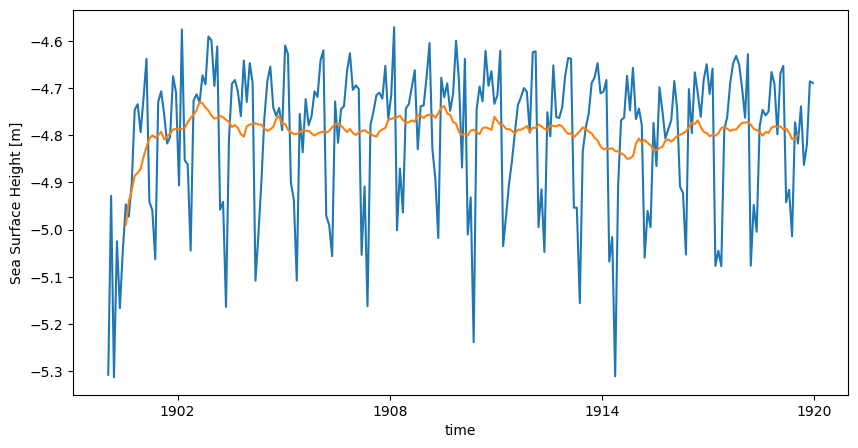

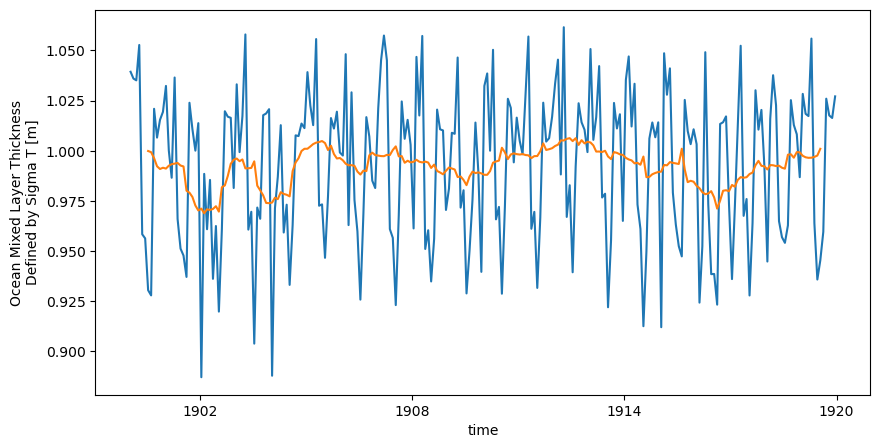

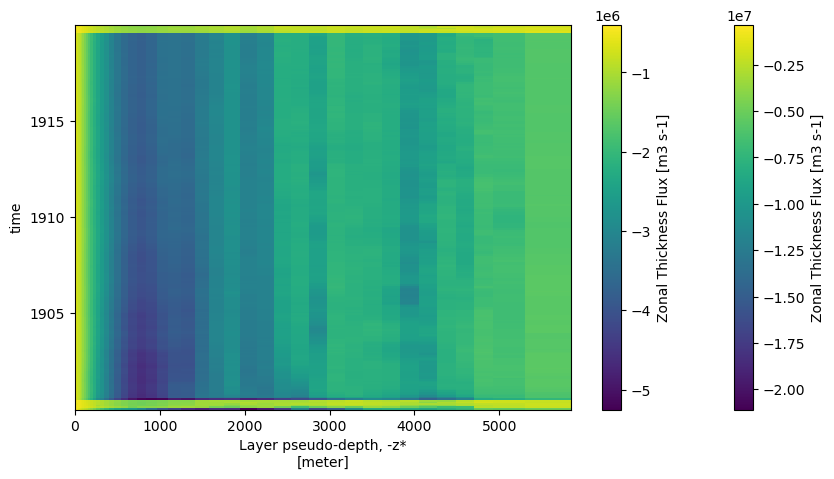

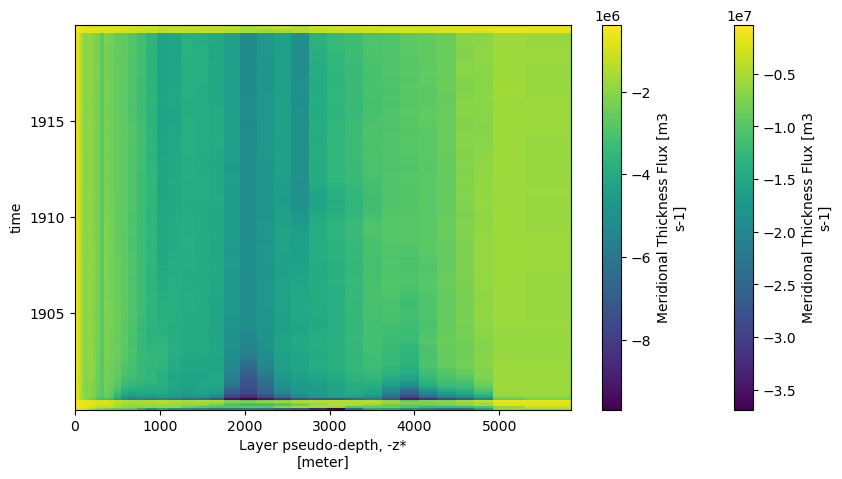

In [34]:
for k, d in data_min.items():
    plt.figure(figsize=(10,5))
    dat = d[k]
    if 'depth' in dat.cf.coords: # https://xgcm.readthedocs.io/en/latest/grid_metrics.html?highlight=average#Grid-aware-(weighted)-average
        dat = dat.cf.min(dim=['latitude', 'longitude', 'depth'])
    elif 'longitude' in dat.cf.coords: # https://xgcm.readthedocs.io/en/latest/grid_metrics.html?highlight=average#Grid-aware-(weighted)-average
        dat = dat.cf.min(dim=['latitude', 'longitude'])
    dat.load()
    dat.plot()
    dat.cf.rolling(time=12, center=True).mean('time').plot()

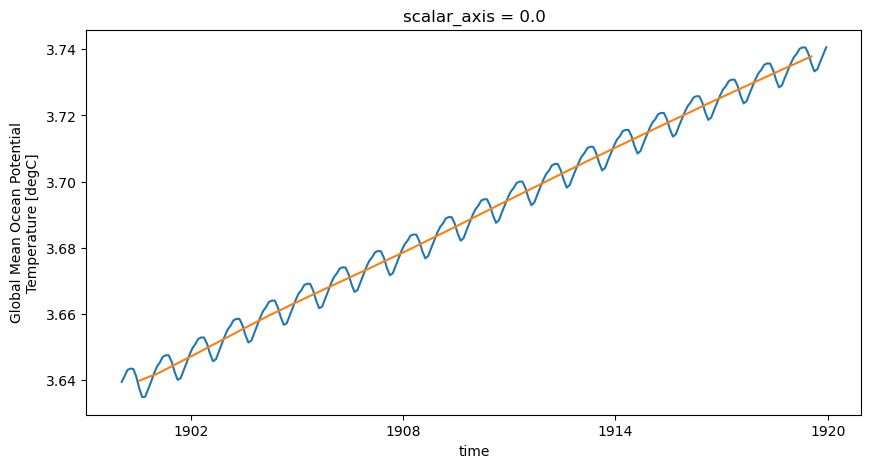

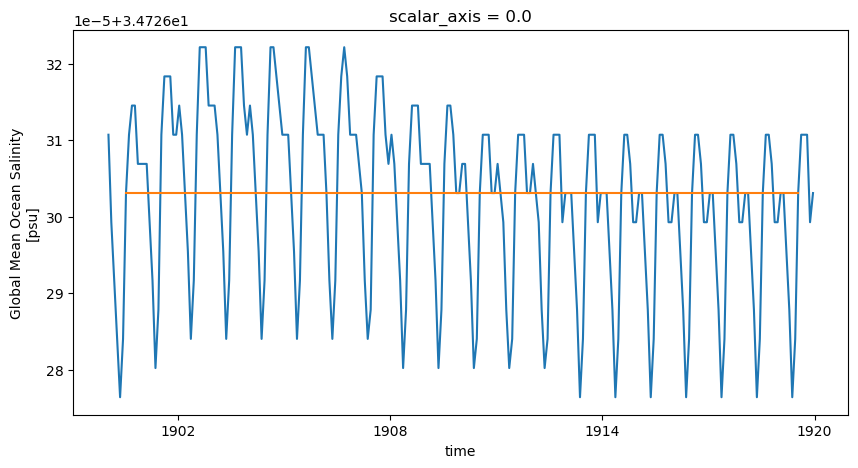

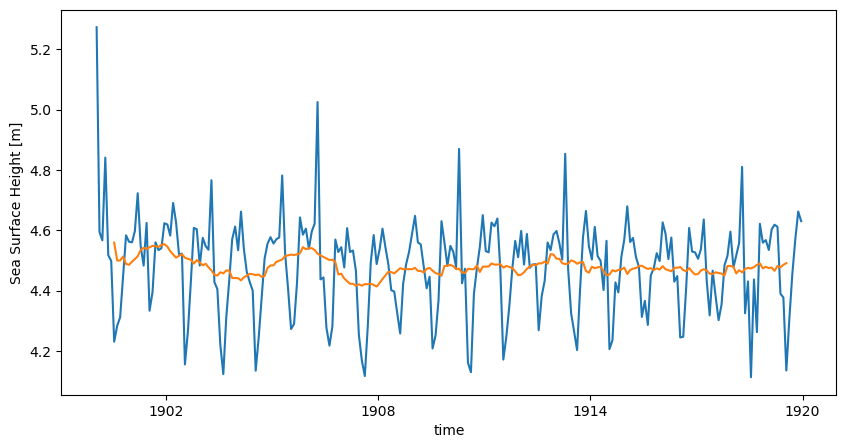

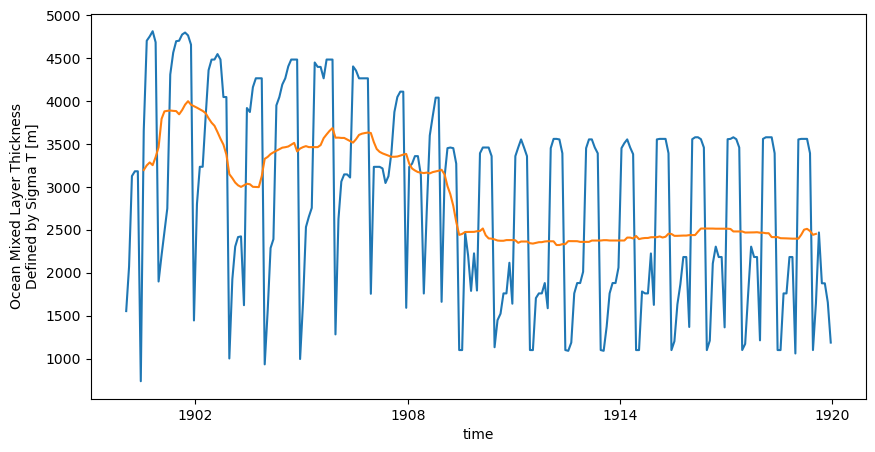

In [29]:
for k, d in data_max.items():
    plt.figure(figsize=(10,5))
    dat = d[k]
    if 'depth' in dat.cf.coords: # https://xgcm.readthedocs.io/en/latest/grid_metrics.html?highlight=average#Grid-aware-(weighted)-average
        dat = dat.cf.max(dim=['latitude', 'longitude', 'depth'])
    elif 'longitude' in dat.cf.coords: # https://xgcm.readthedocs.io/en/latest/grid_metrics.html?highlight=average#Grid-aware-(weighted)-average
        dat = dat.cf.max(dim=['latitude', 'longitude'])
    dat.load()
    dat.plot()
    dat.cf.rolling(time=12, center=True).mean('time').plot()